In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

## Get the data and preprocess it

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

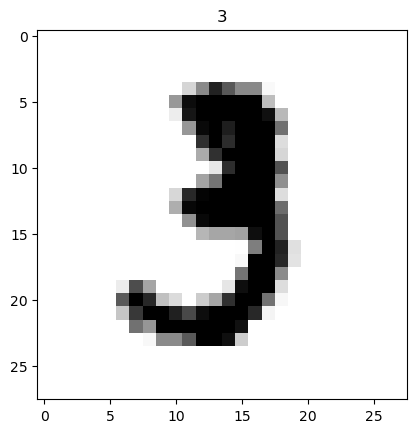

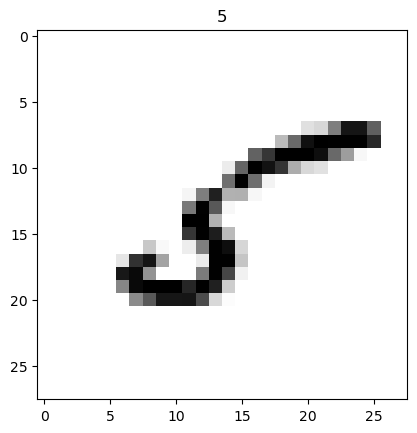

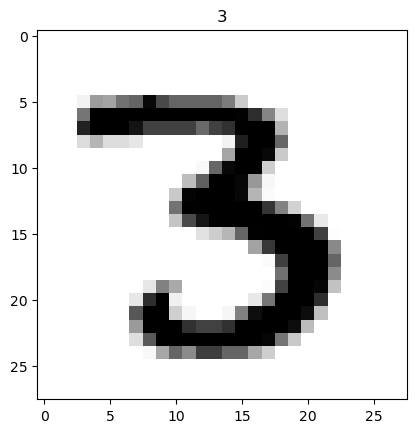

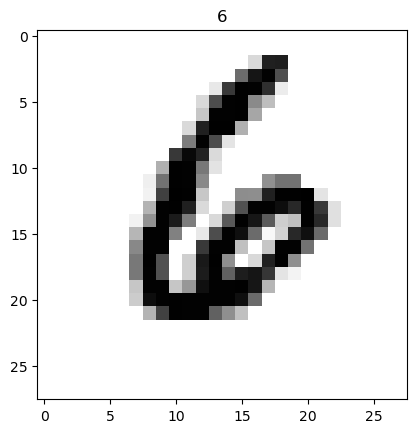

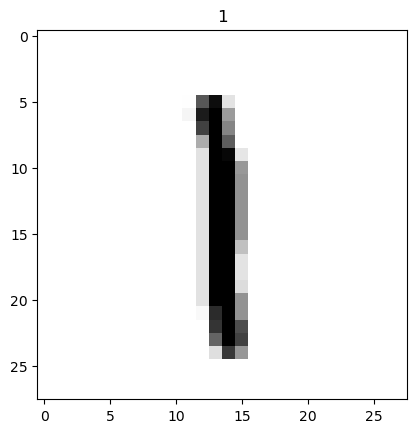

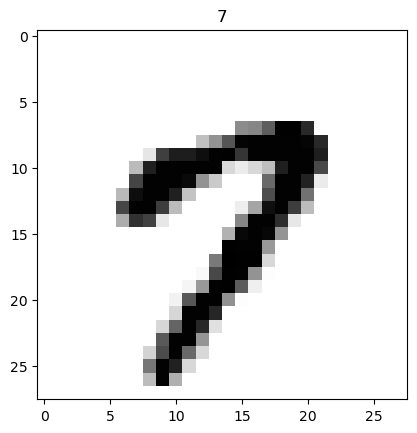

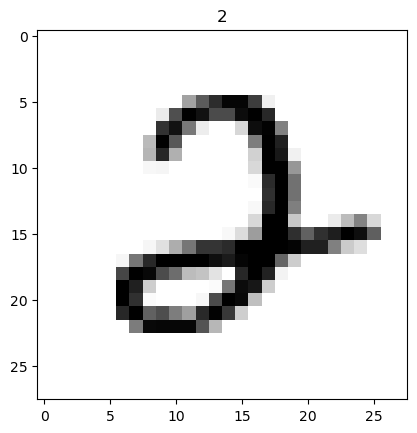

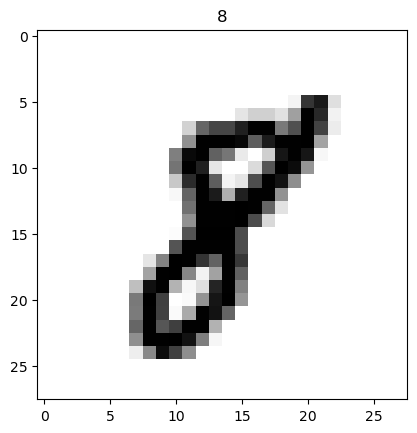

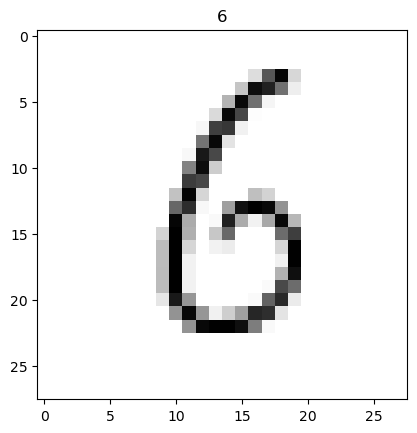

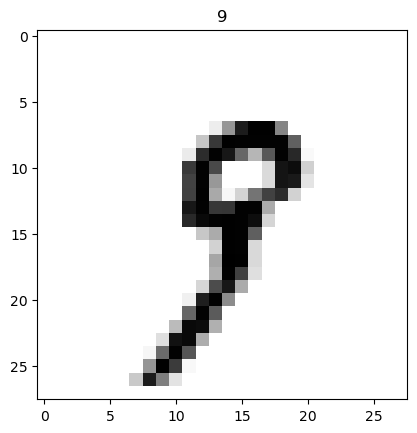

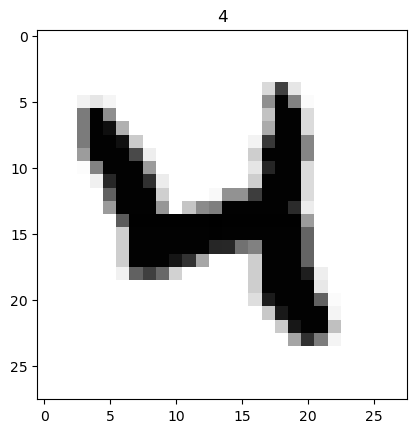

In [4]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()

for i in range(10, 21):
    plot_input_img(i)

In [5]:
# Normalize the img 0 to 1 range
X_train = X_train.astype(np.float32)/255
X_test = X_test.astype(np.float32)/255


### Reshape / expand the diamentions of images to (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

## Convert classes to one hot vectors
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0,25))

model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [8]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [21]:
## callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

### EarlyStopping
es = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose= 1)

## ModelCheckpoint
mc = ModelCheckpoint('./bestmodel.h5', monitor="val_loss", verbose=1, save_best_only=True)

In [22]:
cb = [es, mc]

## Model Training

In [23]:
history = model.fit(X_train, y_train, epochs=50, validation_split=0.3, callbacks=cb)

Epoch 1/50
1312/1313 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9989

In [15]:
model_S = keras.models.load_model('D://Final Year Project//bestmodel.h5')

In [16]:
score = model_S.evaluate(X_test, y_test, )
print(f'the model accuracy is {score[1]}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0444 - accuracy: 0.9900
the model accuracy is 0.9900000095367432
